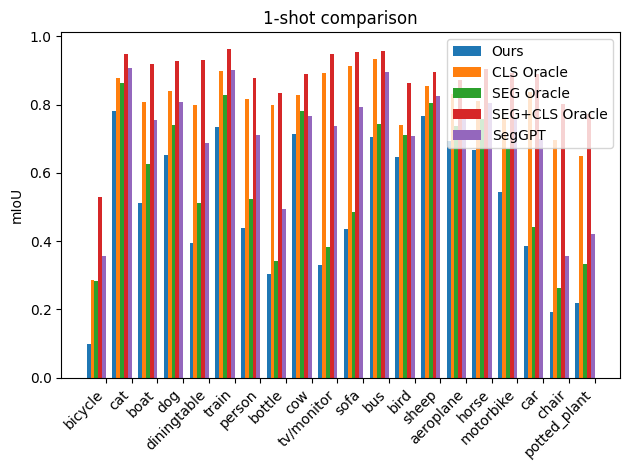

1-shot comparison
Our mean IoU: 0.5107547670608799
SegGPT mean IoU: 0.7079647013831475
CLS Oracle mean IoU: 0.7934916412786638
SEG Oracle mean IoU: 0.5915007500750539
SEG+CLS Oracle mean IoU: 0.8782885403599963


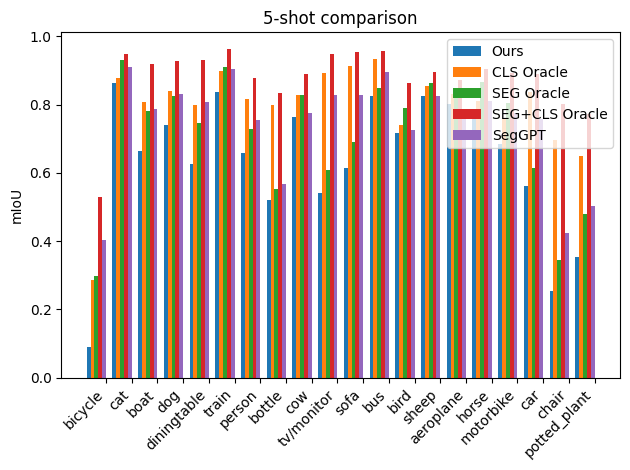

5-shot comparison
Our mean IoU: 0.6354908145378296
SegGPT mean IoU: 0.7442295464596334
CLS Oracle mean IoU: 0.7934916412786638
SEG Oracle mean IoU: 0.7180200237966992
SEG+CLS Oracle mean IoU: 0.8782885403599959


In [14]:
"""We have files `results_ours.txt` and `results_seggpt.txt` that contain, in each line, a string of the form `f'mIoU {n}-shot {class_name}: {mIoU}'` where `n` is the number of shots, `class_name` is the name of the class, and `mIoU` is the mean IoU for that class. For the classes that are in common, do one bar plot per n-shot problem comparing the performance per class."""

import matplotlib.pyplot as plt
import numpy as np
 
def read_file_into_dict(file_path, label):
    """Loads the contents of the file into a nested dict. The outer keys are the number of shots. The inner keys are the class names."""
    results = {}
    with open(file_path, 'r') as f:
        for line in f:
            # line = line.strip()
            # print(line.split(' '))
            first_part = line.split('-')[0]
            line_label, n = ' '.join(first_part.split(' ')[:-1]), int(first_part.split(' ')[-1])
            if line_label != label:
                continue
            _, class_name, mIoU = line.split('-')[1].split(' ')
            mIoU = float(mIoU[:-2])
            class_name = class_name.split(':')[0]
            if n not in results:
                results[n] = {}
            results[n][class_name] = mIoU
    if results == {}:
        print(f'No results found for {label} in {file_path}')
        print(f'found {line_label}')
    return results

def comparison_barplot(number_of_shots: int, file_paths: list[str]):
    """Creates a bar plot comparing the performance of the classes in common between the two files."""
    results_ours = read_file_into_dict(file_paths[0], 'mIoU')
    cls_oracle_ours = read_file_into_dict(file_paths[0], 'cls oracle mIoU')
    seg_oracle_ours = read_file_into_dict(file_paths[0], 'seg oracle mIoU')
    seg_cls_oracle_ours = read_file_into_dict(file_paths[0], 'seg cls oracle mIoU')
    results_seggpt = read_file_into_dict(file_paths[1], 'mIoU')
    classes = list(set(results_ours[number_of_shots].keys()) & set(results_seggpt[number_of_shots].keys()))
    ours = [results_ours[number_of_shots][class_name] for class_name in classes]
    cls_oracle = [cls_oracle_ours[number_of_shots][class_name] for class_name in classes]
    seg_oracle = [seg_oracle_ours[number_of_shots][class_name] for class_name in classes]
    seg_cls_oracle = [seg_cls_oracle_ours[number_of_shots][class_name] for class_name in classes]
    seggpt = [results_seggpt[number_of_shots][class_name] for class_name in classes]

    x = np.arange(len(classes))
    width = 0.15
    fig, ax = plt.subplots()
    rects1 = ax.bar(x + width/2 - width * 5, ours, width, label='Ours')
    rects2 = ax.bar(x + width/2 - width * 4, cls_oracle, width, label='CLS Oracle')
    rects3 = ax.bar(x + width/2 - width * 3, seg_oracle, width, label='SEG Oracle')
    rects4 = ax.bar(x + width/2 - width * 2, seg_cls_oracle, width, label='SEG+CLS Oracle')
    rects5 = ax.bar(x + width/2 - width * 1, seggpt, width, label='SegGPT')
    ax.set_ylabel('mIoU')
    ax.set_title(f'{number_of_shots}-shot comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.legend()
    fig.tight_layout()
    plt.show()
    # print mean iou
    print('='*40)
    print(f'{number_of_shots}-shot comparison')
    print(f'Our mean IoU: {np.mean(ours)}')
    print(f'SegGPT mean IoU: {np.mean(seggpt)}')
    print(f'CLS Oracle mean IoU: {np.mean(cls_oracle)}')
    print(f'SEG Oracle mean IoU: {np.mean(seg_oracle)}')
    print(f'SEG+CLS Oracle mean IoU: {np.mean(seg_cls_oracle)}')

comparison_barplot(1, ['results_ours.txt', 'results_seggpt.txt'])
comparison_barplot(5, ['results_ours.txt', 'results_seggpt.txt'])

